In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

import random

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
import pandas as pd

df = pd.read_csv(".../loan.csv")

# **Data Cleaning and preprocess**

### Datacleaning

In [0]:
df=df.drop(['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','zip_code',
            'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','desc','url','title',
            'initial_list_status','pymnt_plan','policy_code','application_type','earliest_cr_line','last_credit_pull_d',
            'next_pymnt_d','addr_state'],axis=1)
df=df.dropna(thresh=len(df)/2,axis=1)
df=df.dropna()

def status_binary(text):
    if text=='Fully Paid':
        return 0
    elif text=='Current' or text=='Issued':
        return -1
    else:
        return 1
df['loan_status']=df['loan_status'].apply(status_binary)
df=df[df['loan_status']!=-1]
def purpose_class(text):
    if text=='debt_consolidation' or text=='credit_card':
        return 'refinance'
    elif text=='house' or text=='home_improvement' or text=='renewable_energy' or text=='moving':
        return 'home'
    elif text=='car' or text=='major_purchase':
        return 'major_purchase'
    else:
        return 'other'
df['purpose']=df['purpose'].apply(purpose_class)

dummy_df=pd.get_dummies(df[['home_ownership','verification_status','purpose','term']])
df=df.drop(['home_ownership','verification_status','purpose','term'],axis=1)
df=pd.concat([df,dummy_df],axis=1)

mapping_dict={
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'n/a':0
    }
}
df=df.replace(mapping_dict)

cols = list(df)
cols.insert(0, cols.pop(cols.index('loan_status')))
df = df.loc[:, cols]
df.head()
#ref: https://www.kaggle.com/jw3570/p2p-lending-club-data-analysis#notebook-container

## Significance:

In [5]:
df=df.drop(['loan_amnt','grade','term_ 60 months','emp_length', 'pub_rec', 'revol_bal', 'revol_util', 'collections_12_mths_ex_med', 'acc_now_delinq',
            'tot_coll_amt', 'tot_cur_bal', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_home', 'purpose_major_purchase', 'purpose_other',
       'purpose_refinance','inq_last_6mths','total_rev_hi_lim','delinq_2yrs'],axis=1)
df = df.sample(n=20000, random_state=1)
#df[numerical_cols] = df[numerical_cols].astype('float64')

target_col= "loan_status"
X = df.iloc[0:,1:35]
y = df[target_col].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            loan_status   R-squared (uncentered):                   0.329
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              1120.
Date:                Fri, 08 May 2020   Prob (F-statistic):                        0.00
Time:                        07:49:22   Log-Likelihood:                         -8887.3
No. Observations:               16000   AIC:                                  1.779e+04
Df Residuals:                   15993   BIC:                                  1.784e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Correlation:

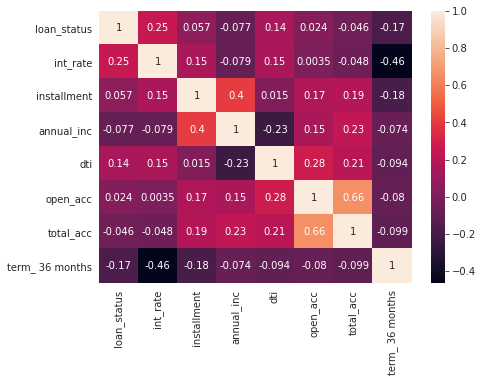

In [6]:
corr=df.corr()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr,annot=True)

# **Analyze**

### Logistic regression

Prediction accuracy: 73.38%


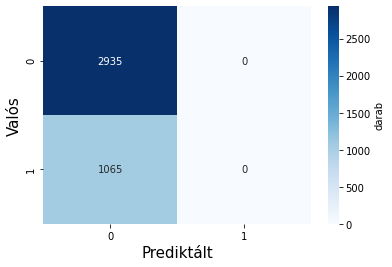

In [20]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline(steps=[('logistic', LogisticRegression())])

pipe.fit(X_train, y_train.values)

estimator = pipe.fit(X_train, y_train) 
estimator

y_pred = estimator.predict(X_test)
print("Prediction accuracy: {:.2f}%".format(np.sum(y_pred == y_test) / len(y_pred) * 100))

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap=plt.cm.Blues, cbar_kws={'label': 'darab'})
plt.xlabel('Prediktált', fontsize=15)
plt.ylabel('Valós', fontsize=15)
plt.show()


### Decision trees

Prediction accuracy: 63.98%


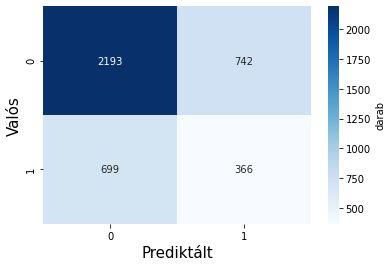

In [21]:
tree = DecisionTreeClassifier()
pipe_f=Pipeline(steps=[('tree', DecisionTreeClassifier())])
pipe_f.fit(X_train, y_train)

estimator = pipe_f.fit(X_train, y_train) 
y_pred = estimator.predict(X_test)
print("Prediction accuracy: {:.2f}%".format(np.sum(y_pred == y_test) / len(y_pred) * 100))
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap=plt.cm.Blues, cbar_kws={'label': 'darab'})
plt.xlabel('Prediktált', fontsize=15)
plt.ylabel('Valós', fontsize=15)
plt.show()


### ANN

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(output_dim=10, init='uniform', activation='relu', input_dim=7))
classifier.add(Dense(output_dim=4, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=10, epochs=50)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=10, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':


Epoch 1/50
16000/16000 [==============================] - 2s 107us/step - loss: 0.5942 - accuracy: 0.7310
Epoch 2/50
16000/16000 [==============================] - 2s 103us/step - loss: 0.5800 - accuracy: 0.7350
Epoch 3/50
16000/16000 [==============================] - 2s 102us/step - loss: 0.5766 - accuracy: 0.7350
Epoch 4/50
16000/16000 [==============================] - 2s 102us/step - loss: 0.5754 - accuracy: 0.7350
Epoch 5/50
16000/16000 [==============================] - 2s 101us/step - loss: 0.5795 - accuracy: 0.7350
Epoch 6/50
16000/16000 [==============================] - 2s 101us/step - loss: 0.5783 - accuracy: 0.7350
Epoch 7/50
16000/16000 [==============================] - 2s 100us/step - loss: 0.5783 - accuracy: 0.7350
Epoch 8/50
16000/16000 [==============================] - 2s 101us/step - loss: 0.5783 - accuracy: 0.7350
Epoch 9/50
16000/16000 [==============================] - 2s 103us/step - loss: 0.5783 - accuracy: 0.7350
Epoch 10/50
16000/16000 [=====================

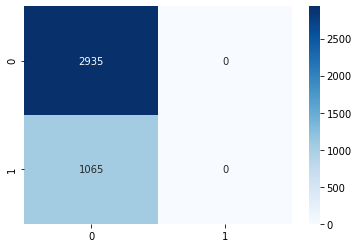

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)

# **Scorecard model**

[INFO] filtering variables ...
Variable filtering on 20000 rows and 8 columns in 00:00:16 
1 variables are removed
[INFO] creating woe binning ...


{'annual_inc': <Figure size 432x288 with 2 Axes>,
 'dti': <Figure size 432x288 with 2 Axes>,
 'installment': <Figure size 432x288 with 2 Axes>,
 'int_rate': <Figure size 432x288 with 2 Axes>,
 'term_ 36 months': <Figure size 432x288 with 2 Axes>,
 'total_acc': <Figure size 432x288 with 2 Axes>}

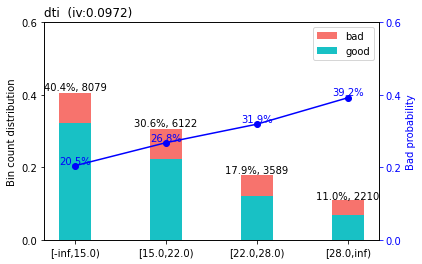

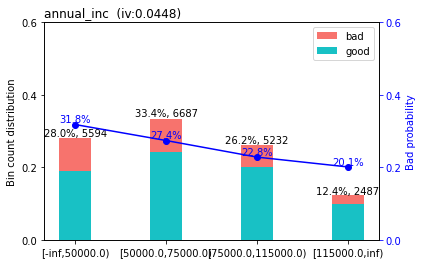

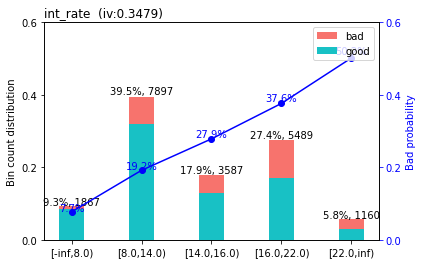

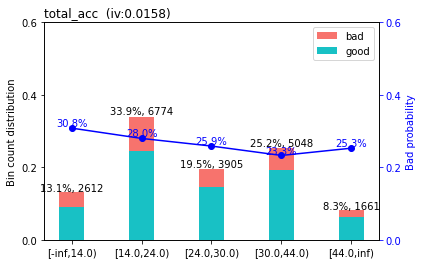

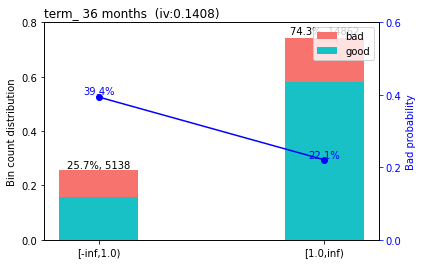

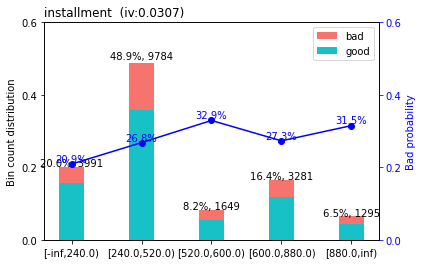

In [0]:
import scorecardpy as sc

dat = df

dt_s = sc.var_filter(dat, y="loan_status")

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'loan_status').values()

# woe binning ------
bins = sc.woebin(dt_s, y="loan_status")
sc.woebin_plot(bins)

In [0]:
#ref: https://pypi.org/project/scorecardpy/

# # adjust breaks interactively
#breaks_adj = sc.woebin_adj(dt_s, "loan_status", bins) 

breaks_adj = {'annual_inc': [50000.0,75000.0,115000.0], 
              'dti': [15.0,22.0,28.0],
              'installment': [240,520],
              'int_rate': [8.0,14.0,16.0,22.0],
              'term_ 36 months': [1.0],
              'total_acc': [14.0,24.0,30.0]}

bins_adj = sc.woebin(dt_s, y="loan_status", breaks_list=breaks_adj)

# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'loan_status']
X_train = train_woe.loc[:,train_woe.columns != 'loan_status']
y_test = test_woe.loc[:,'loan_status']
X_test = test_woe.loc[:,train_woe.columns != 'loan_status']
bins_adj

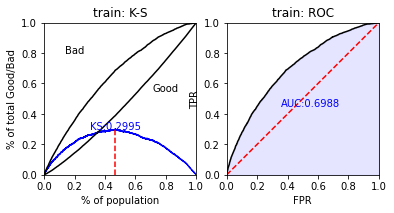

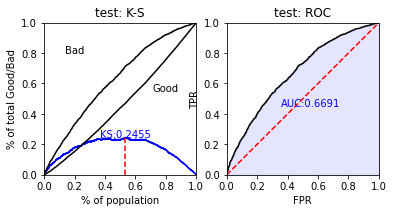

In [0]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

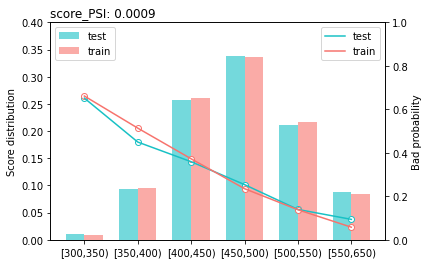

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.000924}

In [0]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [0]:
card

{'annual_inc':      variable                 bin  points
 4  annual_inc      [-inf,50000.0)   -15.0
 5  annual_inc   [50000.0,75000.0)    -3.0
 6  annual_inc  [75000.0,115000.0)    12.0
 7  annual_inc      [115000.0,inf)    21.0,
 'basepoints':      variable  bin  points
 0  basepoints  NaN   462.0,
 'dti':   variable          bin  points
 0      dti  [-inf,15.0)    20.0
 1      dti  [15.0,22.0)    -1.0
 2      dti  [22.0,28.0)   -16.0
 3      dti   [28.0,inf)   -35.0,
 'installment':        variable            bin  points
 19  installment   [-inf,240.0)    22.0
 20  installment  [240.0,520.0)    -1.0
 21  installment    [520.0,inf)   -11.0,
 'int_rate':     variable          bin  points
 8   int_rate   [-inf,8.0)    86.0
 9   int_rate   [8.0,14.0)    25.0
 10  int_rate  [14.0,16.0)    -4.0
 11  int_rate  [16.0,22.0)   -30.0
 12  int_rate   [22.0,inf)   -60.0,
 'term_ 36 months':            variable         bin  points
 17  term_ 36 months  [-inf,1.0)   -20.0
 18  term_ 36 months   [1.